## Model initial training

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import os
from roboflow import Roboflow
from ultralytics import YOLO
import yaml

In [ ]:
DATA_DIR = dataset.location
print("Dataset rooted at:", DATA_DIR)
print(os.listdir(DATA_DIR))

# ── 3) FIX THE data.yaml PATHS ──────────────────────────────────────────────────
orig_yaml = os.path.join(DATA_DIR, "data.yaml")
with open(orig_yaml, 'r') as f:
    data_cfg = yaml.safe_load(f)

# Override any relative-path entries so they point to the absolute folders
data_cfg['train'] = os.path.join(DATA_DIR, "train", "images")
data_cfg['val']   = os.path.join(DATA_DIR, "valid", "images")
data_cfg['test']  = os.path.join(DATA_DIR, "test",  "images")

fixed_yaml = os.path.join(DATA_DIR, "data_fixed.yaml")
with open(fixed_yaml, 'w') as f:
    yaml.dump(data_cfg, f)
print("Wrote fixed YAML to:", fixed_yaml)

Dataset rooted at: /content/dead-fish-3-1
['README.dataset.txt', 'train', 'README.roboflow.txt', 'data.yaml', 'test', 'data_fixed.yaml', 'valid']
Wrote fixed YAML to: /content/dead-fish-3-1/data_fixed.yaml


In [ ]:
# ── 4) TRAIN YOLOv8 ─────────────────────────────────────────────────────────────
# Swap yolov8n.pt for yolov8s.pt if you want a slightly bigger model.
model = YOLO("yolov8n.pt")

In [ ]:
# Train — adjust epochs, batch, imgsz as you like
results = model.train(
    data=fixed_yaml,
    epochs=50,
    batch=16,
    imgsz=640,
    project="dead_vs_alive",
    name="run50",
    device=0     # GPU on Colab
)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dead-fish-3-1/data_fixed.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run50, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

train: Scanning /content/dead-fish-3-1/train/labels.cache... 2610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2610/2610 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 341.8±255.3 MB/s, size: 18.6 KB)


val: Scanning /content/dead-fish-3-1/valid/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<?, ?it/s]


Plotting labels to dead_vs_alive/run50/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to dead_vs_alive/run50
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       3.7G      1.835      2.034      1.482         29        640: 100%|██████████| 164/164 [00:50<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         74        681      0.216      0.489       0.23     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.08G       1.62      1.494      1.367         30        640: 100%|██████████| 164/164 [00:46<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         74        681      0.467       0.68      0.546      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.08G      1.607      1.401      1.364         35        640: 100%|██████████| 164/164 [00:45<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         74        681      0.713      0.701      0.762      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.08G      1.592      1.328       1.38         16        640: 100%|██████████| 164/164 [00:45<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         74        681      0.631      0.637      0.646      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.08G      1.574      1.257      1.361         48        640: 100%|██████████| 164/164 [00:44<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


                   all         74        681      0.576      0.717      0.667      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.08G      1.566      1.237      1.366         20        640: 100%|██████████| 164/164 [00:44<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         74        681      0.527      0.522      0.507       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.08G      1.541      1.203      1.349         54        640: 100%|██████████| 164/164 [00:46<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         74        681      0.607      0.653      0.636      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.09G      1.519      1.163      1.336         32        640: 100%|██████████| 164/164 [00:44<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         74        681      0.442       0.62      0.494       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.1G      1.518      1.174      1.348         22        640: 100%|██████████| 164/164 [00:46<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         74        681      0.724      0.742      0.758        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.1G      1.492      1.132       1.33         33        640: 100%|██████████| 164/164 [00:44<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         74        681      0.726      0.704       0.74       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.1G      1.485      1.126      1.327         18        640: 100%|██████████| 164/164 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         74        681      0.669      0.676      0.685       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.1G      1.497      1.131      1.332         12        640: 100%|██████████| 164/164 [00:45<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         74        681      0.776      0.732      0.805      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.12G       1.47      1.106       1.32         21        640: 100%|██████████| 164/164 [00:44<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         74        681      0.648       0.67       0.67      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.12G      1.472      1.099      1.312         29        640: 100%|██████████| 164/164 [00:46<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         74        681      0.631      0.744      0.714      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.12G      1.463      1.072      1.316         30        640: 100%|██████████| 164/164 [00:44<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         74        681      0.681      0.691      0.689      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.12G      1.456      1.062      1.307          8        640: 100%|██████████| 164/164 [00:46<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         74        681      0.742      0.724      0.774      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.12G      1.435      1.044      1.299         30        640: 100%|██████████| 164/164 [00:44<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         74        681      0.832      0.864      0.887      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.13G      1.427      1.038      1.294         23        640: 100%|██████████| 164/164 [00:45<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         74        681      0.683      0.708      0.725      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.13G      1.402      1.029      1.278         36        640: 100%|██████████| 164/164 [00:45<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         74        681      0.768      0.785      0.777      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.13G      1.376      1.027      1.259         22        640: 100%|██████████| 164/164 [00:44<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         74        681      0.766      0.787      0.796      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.15G      1.357      1.005      1.254         29        640: 100%|██████████| 164/164 [00:45<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         74        681      0.726       0.71      0.733      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.15G      1.345     0.9905      1.248         21        640: 100%|██████████| 164/164 [00:44<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         74        681      0.843      0.856      0.888      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.15G      1.342      0.981      1.243         28        640: 100%|██████████| 164/164 [00:45<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         74        681      0.825      0.828      0.849      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.16G      1.337     0.9702      1.246         21        640: 100%|██████████| 164/164 [00:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         74        681      0.832      0.859      0.875      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.16G      1.327     0.9588      1.243         30        640: 100%|██████████| 164/164 [00:45<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         74        681      0.846      0.864      0.884      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.17G      1.322     0.9617      1.238         13        640: 100%|██████████| 164/164 [00:44<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         74        681      0.812      0.819      0.858      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.17G      1.322     0.9491      1.236         10        640: 100%|██████████| 164/164 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         74        681      0.838      0.867       0.89      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.17G      1.306      0.922      1.221         31        640: 100%|██████████| 164/164 [00:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         74        681      0.865      0.869      0.904      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.17G        1.3     0.9147      1.221         39        640: 100%|██████████| 164/164 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         74        681      0.805      0.819      0.843      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.17G      1.297     0.9001      1.218         19        640: 100%|██████████| 164/164 [00:45<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         74        681      0.885      0.887      0.912      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.17G      1.283     0.8954      1.211         28        640: 100%|██████████| 164/164 [00:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         74        681      0.867      0.903       0.92      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.17G      1.281     0.8964      1.214         22        640: 100%|██████████| 164/164 [00:46<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         74        681      0.897      0.892      0.922      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.17G       1.28     0.8782       1.21         16        640: 100%|██████████| 164/164 [00:43<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         74        681      0.812       0.83      0.866      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.17G      1.271     0.8594      1.204         37        640: 100%|██████████| 164/164 [00:44<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         74        681       0.89      0.897      0.921      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.17G      1.272     0.8649      1.208         13        640: 100%|██████████| 164/164 [00:44<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         74        681      0.877      0.893      0.916      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.17G      1.255     0.8385      1.198         14        640: 100%|██████████| 164/164 [00:45<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         74        681      0.865      0.885      0.911      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.17G      1.259     0.8279        1.2         14        640: 100%|██████████| 164/164 [00:44<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         74        681      0.895      0.902      0.919      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.17G       1.26     0.8329        1.2         14        640: 100%|██████████| 164/164 [00:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         74        681      0.901      0.916      0.937      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.17G      1.253     0.8252      1.192         12        640: 100%|██████████| 164/164 [00:44<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         74        681      0.856      0.862      0.883      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.18G       1.24     0.8077      1.186         20        640: 100%|██████████| 164/164 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         74        681      0.849      0.887      0.891      0.414


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.18G      1.213     0.7923      1.198         15        640: 100%|██████████| 164/164 [00:44<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         74        681       0.89      0.928      0.928       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.18G      1.191     0.7535      1.182         24        640: 100%|██████████| 164/164 [00:43<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         74        681      0.911      0.911      0.922      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.18G       1.17     0.7274      1.171         14        640: 100%|██████████| 164/164 [00:41<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         74        681      0.888      0.905      0.914      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.18G      1.167     0.7103      1.173         23        640: 100%|██████████| 164/164 [00:42<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         74        681      0.896      0.901      0.917      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.18G      1.164     0.7069       1.17         19        640: 100%|██████████| 164/164 [00:42<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         74        681        0.9      0.912      0.924      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.18G      1.162      0.715      1.173         20        640: 100%|██████████| 164/164 [00:43<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         74        681      0.888      0.901      0.904      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.18G      1.145     0.7037      1.164         14        640: 100%|██████████| 164/164 [00:42<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         74        681        0.9      0.885      0.915      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.18G      1.141     0.6787      1.156         14        640: 100%|██████████| 164/164 [00:44<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         74        681        0.9      0.914      0.931      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.18G      1.145     0.6779      1.166         12        640: 100%|██████████| 164/164 [00:42<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]

                   all         74        681      0.897      0.923      0.931      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.18G      1.121     0.6672      1.142         26        640: 100%|██████████| 164/164 [00:41<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         74        681      0.896      0.907      0.926      0.495



50 epochs completed in 0.639 hours.
Optimizer stripped from dead_vs_alive/run50/weights/last.pt, 6.2MB
Optimizer stripped from dead_vs_alive/run50/weights/best.pt, 6.2MB

Validating dead_vs_alive/run50/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


                   all         74        681      0.903      0.911      0.924      0.511
            fish-alive         72        496      0.876      0.893      0.904      0.451
             fish-dead         37        185       0.93       0.93      0.944      0.572
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to dead_vs_alive/run50


In [ ]:
# ── 5) EVAL & EXPORT ───────────────────────────────────────────────────────────
metrics = results.results_dict

print(f"Precision  (B): {metrics['metrics/precision(B)']:.4f}")
print(f"Recall     (B): {metrics['metrics/recall(B)']:.4f}")
print(f"mAP@0.5    (B): {metrics['metrics/mAP50(B)']:.4f}")
print(f"mAP@0.5–0.95(B): {metrics['metrics/mAP50-95(B)']:.4f}")

# Export to ONNX for deployment
model.export(format="onnx", weights="best")
print("Exported ONNX model at:",
      os.path.join("dead_vs_alive", "run50", "weights", "best.onnx"))

Precision  (B): 0.9029
Recall     (B): 0.9114
mAP@0.5    (B): 0.9240
mAP@0.5–0.95(B): 0.5114


SyntaxError: '[31m[1mweights[0m' is not a valid YOLO argument. Similar arguments are i.e. ['weight_decay=0.0005'].

    Arguments received: ['yolo', '-f', '/root/.local/share/jupyter/runtime/kernel-b2438edf-3f9f-409e-953d-e5c239462a08.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['pose', 'segment', 'detect', 'obb', 'classify']
                MODE (required) is one of ['track', 'val', 'predict', 'export', 'train', 'benchmark']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo11n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolo11n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLO11n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolo11n-cls.pt format=onnx imgsz=224,128

    5. Ultralytics solutions usage
        yolo solutions count or in ['crop', 'blur', 'workout', 'heatmap', 'isegment', 'visioneye', 'speed', 'queue', 'analytics', 'inference', 'trackzone'] source="path/to/video.mp4"

    6. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg
        yolo solutions help

    Docs: https://docs.ultralytics.com
    Solutions: https://docs.ultralytics.com/solutions/
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)

In [ ]:
# prompt: zip the dead_vs_alive/run50 folder, then download it

!zip -r dead_vs_alive_run50.zip dead_vs_alive/run50/
from google.colab import files
files.download('dead_vs_alive_run50.zip')

  adding: dead_vs_alive/run50/ (stored 0%)
  adding: dead_vs_alive/run50/train_batch6561.jpg (deflated 9%)
  adding: dead_vs_alive/run50/BoxF1_curve.png (deflated 11%)
  adding: dead_vs_alive/run50/BoxR_curve.png (deflated 13%)
  adding: dead_vs_alive/run50/val_batch0_pred.jpg (deflated 7%)
  adding: dead_vs_alive/run50/train_batch6560.jpg (deflated 11%)
  adding: dead_vs_alive/run50/results.csv (deflated 60%)
  adding: dead_vs_alive/run50/BoxP_curve.png (deflated 11%)
  adding: dead_vs_alive/run50/val_batch1_labels.jpg (deflated 8%)
  adding: dead_vs_alive/run50/train_batch1.jpg (deflated 4%)
  adding: dead_vs_alive/run50/args.yaml (deflated 52%)
  adding: dead_vs_alive/run50/weights/ (stored 0%)
  adding: dead_vs_alive/run50/weights/best.pt (deflated 9%)
  adding: dead_vs_alive/run50/weights/last.pt (deflated 9%)
  adding: dead_vs_alive/run50/confusion_matrix_normalized.png (deflated 30%)
  adding: dead_vs_alive/run50/labels.jpg (deflated 26%)
  adding: dead_vs_alive/run50/val_batch2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Video handling

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort  # pip install deep-sort-realtime

# ── A) CONFIG ────────────────────────────────────────────────────────────────
VIDEO_SOURCE       = 0            # 0 for webcam or "rtsp://..." or path/to/video.mp4
IMG_SIZE           = 640
CONF_THRESH_DEAD   = 0.15         # Low threshold for dead-fish class
CONF_THRESH_OTHER  = 0.35         # Higher for alive / other classes
TRACK_WINDOW_FRAMES= 5

# ── B) LOAD MODEL + TRACKER ─────────────────────────────────────────────────
model = YOLO("dead_vs_alive/run1/weights/best.pt")
tracker = DeepSort(max_age=TRACK_WINDOW_FRAMES)

# ── C) OPEN VIDEO SOURCE ────────────────────────────────────────────────────
cap = cv2.VideoCapture(VIDEO_SOURCE)
assert cap.isOpened(), "Cannot open video source"

# Per-track buffer of “dead” confidences
track_history = {}  # track_id → [last N dead_conf scores]

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # ── 1) PREPROCESS ────────────────────────────────────────────────────────
    h, w = frame.shape[:2]
    img = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ── 2) INFERENCE ─────────────────────────────────────────────────────────
    results = model(img_rgb)[0]

    dets = []
    for *xyxy, conf, cls in results.boxes.data.cpu().numpy():
        # Scale boxes back to original frame size
        x1, y1, x2, y2 = np.array(xyxy) * np.array([w/IMG_SIZE, h/IMG_SIZE, w/IMG_SIZE, h/IMG_SIZE])
        cls = int(cls)
        # Apply per-class thresholds
        if cls == 1 and conf >= CONF_THRESH_DEAD:           # dead-fish class index = 1
            dets.append((x1, y1, x2-x1, y2-y1, conf, "dead"))
        elif cls == 0 and conf >= CONF_THRESH_OTHER:        # alive-fish class index = 0
            dets.append((x1, y1, x2-x1, y2-y1, conf, "alive"))

    # ── 3) TRACKING ────────────────────────────────────────────────────────────
    tracks = tracker.update_tracks(dets, frame=frame)

    # ── 4) POST-PROCESS & FN MITIGATION ───────────────────────────────────────
    for t in tracks:
        tid = t.track_id
        bbox = t.to_ltwh()
        label = t.get_det_class()       # "dead" or "alive"
        conf  = t.get_det_confidence()  # last-frame confidence

        # update history buffer
        buf = track_history.get(tid, [])
        buf.append(conf if label=="dead" else 0.0)
        buf = buf[-TRACK_WINDOW_FRAMES:]
        track_history[tid] = buf

        # if any recent frame saw dead_conf > CONF_THRESH_DEAD, lock as dead
        if any(c > CONF_THRESH_DEAD for c in buf):
            label = "dead"

        # draw box + label
        x, y, w_box, h_box = map(int, bbox)
        color = (0,0,255) if label=="dead" else (0,255,0)
        cv2.rectangle(frame, (x,y), (x+w_box,y+h_box), color, 2)
        cv2.putText(frame, f"{label} {conf:.2f}", (x,y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # alert once per track
        if label=="dead" and buf[-1] > CONF_THRESH_DEAD and buf[-2] <= CONF_THRESH_DEAD:
            print(f"[ALERT] Dead fish detected on track {tid}!")

    # ── 5) DISPLAY ────────────────────────────────────────────────────────────
    cv2.imshow("Dead vs Alive Fish", frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [1]:
!unzip dead_vs_alive_run50.zip

Archive:  dead_vs_alive_run50.zip
   creating: dead_vs_alive/run50/
  inflating: dead_vs_alive/run50/train_batch6561.jpg  
  inflating: dead_vs_alive/run50/BoxF1_curve.png  
  inflating: dead_vs_alive/run50/BoxR_curve.png  
  inflating: dead_vs_alive/run50/val_batch0_pred.jpg  
  inflating: dead_vs_alive/run50/train_batch6560.jpg  
  inflating: dead_vs_alive/run50/results.csv  
  inflating: dead_vs_alive/run50/BoxP_curve.png  
  inflating: dead_vs_alive/run50/val_batch1_labels.jpg  
  inflating: dead_vs_alive/run50/train_batch1.jpg  
  inflating: dead_vs_alive/run50/args.yaml  
   creating: dead_vs_alive/run50/weights/
  inflating: dead_vs_alive/run50/weights/best.pt  
  inflating: dead_vs_alive/run50/weights/last.pt  
  inflating: dead_vs_alive/run50/confusion_matrix_normalized.png  
  inflating: dead_vs_alive/run50/labels.jpg  
  inflating: dead_vs_alive/run50/val_batch2_labels.jpg  
  inflating: dead_vs_alive/run50/val_batch2_pred.jpg  
  inflating: dead_vs_alive/run50/BoxPR_curve.p


0: 640x640 3 fish-alives, 4 fish-deads, 9.9ms
Speed: 4.7ms preprocess, 9.9ms inference, 151.8ms postprocess per image at shape (1, 3, 640, 640)


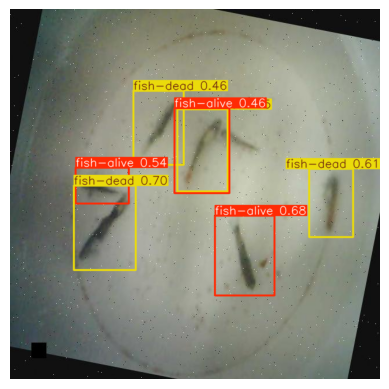

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("dead_vs_alive/run50/weights/best.pt")

# Path to your new image
img_path = "/content/dead-fish-3-1/train/images/106_jpg.rf.55de7955ba359856c707aa0c32ab38ea.jpg"

# Read & convert
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Inference
res = model(img_rgb)[0]

# Annotate & display
annotated = res.plot()
plt.imshow(annotated)
plt.axis("off")
plt.show()

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO("dead_vs_alive/run1/weights/best.pt")
cap   = cv2.VideoCapture(0)  # or "path/to/video.mp4"

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Inference expects RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    res = model(frame_rgb)[0]

    # Get annotated BGR image for OpenCV display
    annotated_bgr = cv2.cvtColor(res.plot(), cv2.COLOR_RGB2BGR)

    cv2.imshow("Dead vs Alive Fish", annotated_bgr)
    if cv2.waitKey(1) == 27:  # ESC to quit
        break

cap.release()
cv2.destroyAllWindows()